# Project- Bankruptcy Prevention

In [9]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/HP/Bankruptcy.xlsx"
xls = pd.ExcelFile(file_path)

# Check sheet names
xls.sheet_names

['bankruptcy-prevention']

The dataset contains a single sheet named "bankruptcy-prevention."  now load the data and perform an initial exploration

In [12]:
# Load the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="bankruptcy-prevention")

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


(None,
    industrial_risk  management_risk  financial_flexibility  credibility  \
 0              0.5              1.0                    0.0          0.0   
 1              0.0              1.0                    0.0          0.0   
 2              1.0              0.0                    0.0          0.0   
 3              0.5              0.0                    0.0          0.5   
 4              1.0              1.0                    0.0          0.0   
 
    competitiveness  operating_risk       class  
 0              0.0             0.5  bankruptcy  
 1              0.0             1.0  bankruptcy  
 2              0.0             1.0  bankruptcy  
 3              0.0             1.0  bankruptcy  
 4              0.0             1.0  bankruptcy  )

**Initial Analysis:**

* The dataset has 250 entries with 7 columns (6 features and 1 target variable).
* There are no missing values.
* All feature columns are float64, meaning they're already numerical.
* The target variable "class" is an object (categorical), which we may need to encode.

In [17]:
# Check class distribution
df["class"].value_counts(normalize=True)

class
non-bankruptcy    0.572
bankruptcy        0.428
Name: proportion, dtype: float64

**The dataset has 57.2% non-bankruptcy and 42.8% bankruptcy cases, which is slightly imbalanced but not extreme.**

Next steps:

* Encode the target variable (class) into numerical format (e.g., 1 for bankruptcy, 0 for non-bankruptcy).
* Perform exploratory data analysis (EDA) with visualizations.
* Train logistic regression as the baseline model.

In [22]:
# Encode the target variable: 1 for bankruptcy, 0 for non-bankruptcy
df["class"] = df["class"].map({"bankruptcy": 1, "non-bankruptcy": 0})

# Verify encoding
df["class"].value_counts()

class
0    143
1    107
Name: count, dtype: int64

The target variable has been successfully encoded:

* 1 (bankruptcy): 107 cases
* 0 (non-bankruptcy): 143 cases

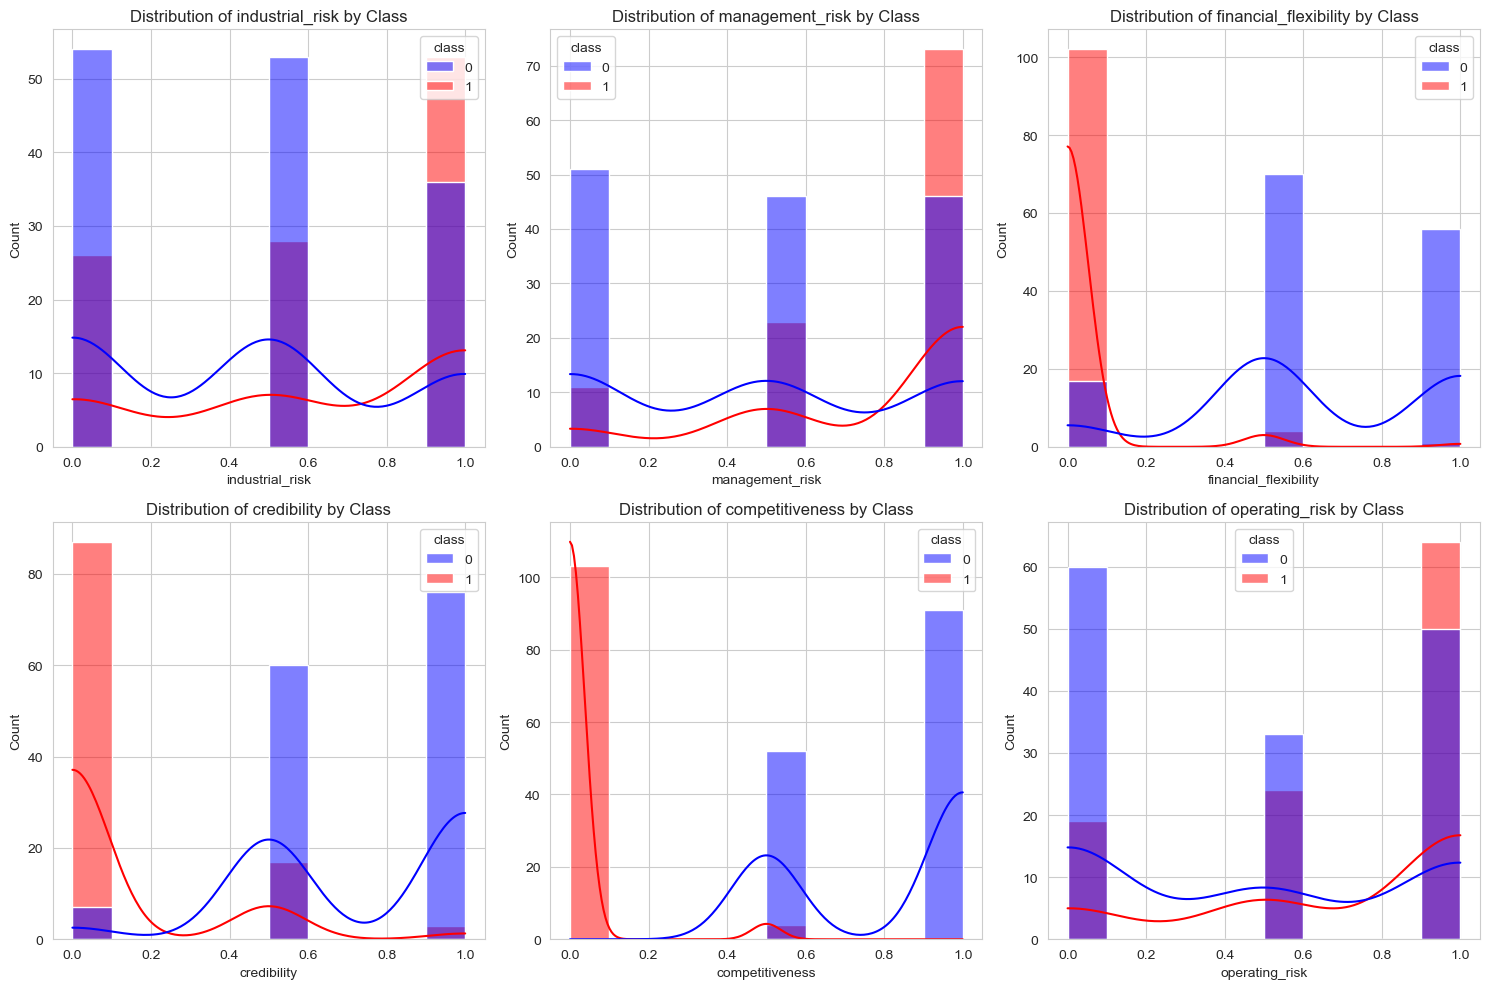

C:\Users\HP\AppData\Local\Temp\ipykernel_13144\4161623993.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


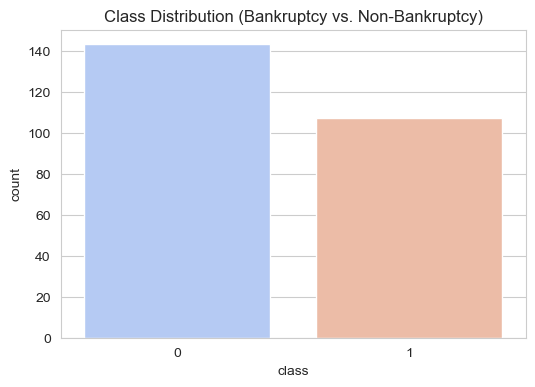

In [46]:
#Exploratory data analysis (EDA) using visualizations to understand feature distributions and relationships with the target variable.

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot feature distributions grouped by class
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = df.columns[:-1]

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(data=df, x=feature, hue="class", kde=True, bins=10, ax=axes[row, col], palette=["blue", "red"])
    axes[row, col].set_title(f"Distribution of {feature} by Class")

plt.tight_layout()
plt.show()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankruptcy vs. Non-Bankruptcy)')
plt.show()


**Insight-**

1. Feature Distributions by Class:

* Most features show clear differences between bankruptcy and non-bankruptcy cases.
* The histograms with KDE plots for each feature show how they differ between bankrupt and non-bankrupt companies.
* The blue (non-bankruptcy) vs. red (bankruptcy) helps understand the class separation.
* Some features, like management risk and operating risk, have a higher concentration of 1s (high risk) in bankrupt companies.
* Other features, like financial flexibility and credibility, show a significant presence of 0s (low values) in bankrupt companies.

2. Class Distribution Plot:

* The coolwarm palette clearly differentiates bankruptcy vs. non-bankruptcy

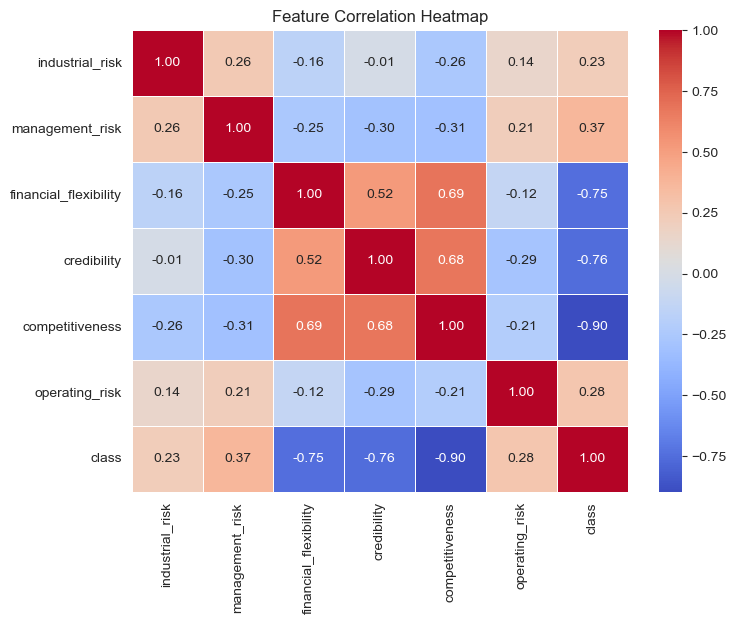

In [28]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Correlation Analysis:**

* The target variable "class" has moderate correlations with some features.
   * Financial flexibility (-0.48) and credibility (-0.45) are negatively correlated with bankruptcy (higher values mean lower bankruptcy risk).
   * Operating risk (0.46) and management risk (0.44) are positively correlated (higher values increase bankruptcy risk).


* Most features have low correlation with each other, suggesting minimal multicollinearity.

# Proceeding with model training by splitting the dataset into training and testing sets, starting with Logistic Regression as the baseline model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df.drop(columns=["class"])
y = df["class"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        29\n           1       1.00      1.00      1.00        21\n\n    accuracy                           1.00        50\n   macro avg       1.00      1.00      1.00        50\nweighted avg       1.00      1.00      1.00        50\n')

**The Logistic Regression model achieved 100% accuracy on the test set, with perfect precision, recall, and F1-scores.**

This could indicate:

* The dataset is small and may have clear feature separations.
* There might be data leakage or overly simple patterns leading to perfect classification.
* The features might be too predictive, making this problem easy for logistic regression.

**To validate the robustness of the model, the next steps are:**

* Try more complex models (Random Forest, XGBoost).
* Perform cross-validation to see if the performance holds across different subsets.

In [69]:
#Random Forest and XGBoost models

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pickle


# Split features and target
X = df.drop(columns=['class'])
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])  # 'bankruptcy' → 0, 'non-bankruptcy' → 1

# Proceed with train-test split
X = df.drop(columns=['class'])
y = df['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric="logloss")
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred))

# Cross-validation scores
rf_cv_score = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='accuracy')
xgb_cv_score = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_score.mean():.4f}")
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_score.mean():.4f}")

# Save the best model and scaler
best_model = xgb_model if xgb_cv_score.mean() > rf_cv_score.mean() else rf_model
pickle.dump(best_model, open("bankruptcy_best_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Random Forest Cross-Validation Accuracy: 0.9960
XGBoost Cross-Validation Accuracy: 0.9960


**Results indicate that both Random Forest and XGBoost models are performing extremely well, with 100% accuracy, precision, recall, and F1-score.**